# Mutual Info Classification (Feature Selection)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
s[s>0] 

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X & Y

In [6]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Seperate Cat & Con

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Cabin', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Feature Selection pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
### num pipeline
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

###cat_pipe1
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unkown')),
                            ('ordinal',OrdinalEncoder())])

### Combine both pipeline
pre1 = ColumnTransformer([('num',num_pipe1,con),
                          ('cat',cat_pipe1,cat)])

In [14]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [15]:
cols = pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,147.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,30.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,147.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,60.0,0.0


### Preprocessing with Mutual Info 

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)

In [18]:
mi

array([0.06990567, 0.04484997, 0.01077125, 0.        , 0.13595499,
       0.15102349, 0.0681553 , 0.0242856 ])

In [19]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.151023
num__Fare        0.135955
num__Pclass      0.069906
cat__Cabin       0.068155
num__Age         0.044850
cat__Embarked    0.024286
num__SibSp       0.010771
num__Parch       0.000000
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

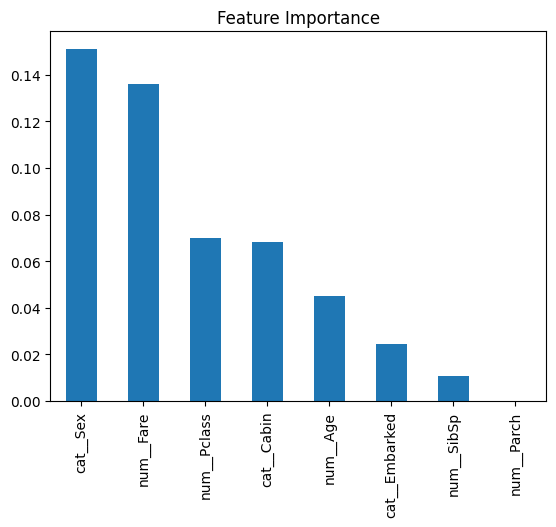

In [20]:
mi.plot(kind='bar',title='Feature Importance')

In [21]:
sel_features = list(mi.index[0:6])
sel_features

['cat__Sex',
 'num__Fare',
 'num__Pclass',
 'cat__Cabin',
 'num__Age',
 'cat__Embarked']

In [22]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=6)
sel_feat = sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__SibSp', 'num__Parch', 'num__Fare', 'cat__Sex',
       'cat__Cabin'], dtype=object)

### get the important columns

In [23]:
sel_cols[0].split('__')[1]

'Pclass'

In [24]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)


In [25]:
imp_cols

['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Cabin']

In [26]:
X_sel = X[imp_cols]
X_sel.head()

,Pclass,SibSp,Parch,Fare,Sex,Cabin
0,3,1,0,7.2500,male,NaN
1,1,1,0,71.2833,female,C85
2,3,0,0,7.9250,female,NaN
3,1,1,0,53.1000,female,C123
4,3,0,0,8.0500,male,NaN


### Seperate Cat & Con

In [27]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat_sel

['Sex', 'Cabin']

In [29]:
con_sel

['Pclass', 'SibSp', 'Parch', 'Fare']

### Create a final pipeline

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
###num pipeline
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

### Cat pipeline
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

### Combine both pipeline
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)])

In [32]:
X_pre_sel = pre2.fit_transform(X_sel).toarray()
X_pre_sel

array([[ 0.82737724,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

In [33]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       'cat__Cabin_B

In [34]:
X_sel_pre = pd.DataFrame(X_pre_sel,columns=final_cols)
X_sel_pre

,num__Pclass,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.474545,-0.473674,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train test Split

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [36]:
xtrain.shape

(712, 154)

In [37]:
xtest.shape

(179, 154)

### Applying Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

### Calculate the accuracy in train & test

In [39]:
model.score(xtrain,ytrain)

0.8426966292134831

In [40]:
model.score(xtest,ytest)

0.7932960893854749

### Predict on train & test data

In [41]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [44]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [45]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Plot the confusion matrix

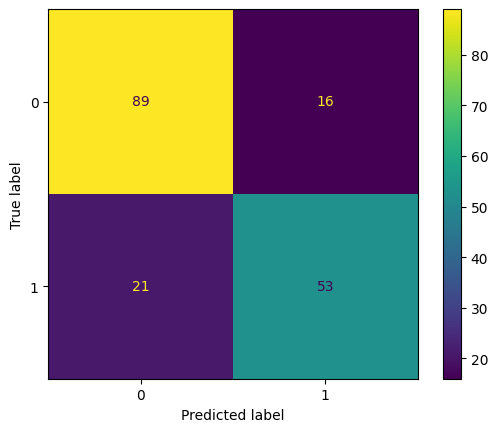

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Show the classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ypred_ts,ytest))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.72      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



### Predicting results for new data

In [48]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.43279337,  0.76762988, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,num__Pclass,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Predict results with probablity

In [51]:
preds = model.predict(xnew_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [52]:
prob = model.predict_proba(xnew_pre)[:,1]
prob

array([0.12003637, 0.60828298, 0.19373752, 0.12036935, 0.58777831,
       0.12059456, 0.66875684, 0.15208841, 0.66842195, 0.07939479,
       0.12006295, 0.30893346, 0.91799083, 0.16460454, 0.88103128,
       0.74603042, 0.19531378, 0.11979544, 0.60911545, 0.66841844,
       0.28110229, 0.10764958, 0.87121821, 0.31502665, 0.94499178,
       0.09735454, 0.92368495, 0.11979544, 0.4463177 , 0.0787151 ,
       0.16460454, 0.13427611, 0.56974527, 0.57240613, 0.35471116,
       0.11979711, 0.66910896, 0.66962114, 0.1207048 , 0.14085553,
       0.11142531, 0.44263253, 0.12004467, 0.78279347, 0.9091326 ,
       0.12007461, 0.44557085, 0.12000477, 0.93418766, 0.62790453,
       0.40994659, 0.19691216, 0.66693043, 0.87228281, 0.19723855,
       0.0449046 , 0.12006295, 0.16942464, 0.09788709, 0.96629989,
       0.12006295, 0.1959976 , 0.12000477, 0.66883702, 0.49837122,
       0.78788903, 0.66896606, 0.32231704, 0.44448602, 0.90298973,
       0.66885794, 0.12006295, 0.66900438, 0.4437242 , 0.95944

### Save value to Dataframe

In [54]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [56]:
df_final['Survived_pred'] = preds
df_final['Survived_prob'] = prob

In [57]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.120036
1,893,1,0.608283
2,894,0,0.193738
3,895,0,0.120369
4,896,1,0.587778
...,...,...,...
413,1305,0,0.120125
414,1306,1,0.941369
415,1307,0,0.119805
416,1308,0,0.120125
